In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

In [3]:
df = pd.read_csv("store.csv",index_col=0)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2004-04-07,59.43,59.62,58.60,59.03,4543601
2004-04-08,58.96,60.13,58.06,58.79,7301119
2004-04-12,55.26,59.53,55.26,58.38,2854237
2004-04-13,58.50,60.47,57.62,60.06,4000517
2004-04-15,60.00,60.82,59.48,60.14,4575190


In [7]:

data = df['Close']
data = data[-151:-1]
model = ARIMA(data, order=(5,1,0))
fitted_model = model.fit()

c:\Users\91952\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\91952\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\91952\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [8]:
forecast_steps = 30  # Example: forecast next 30 days
forecast = fitted_model.forecast(steps=forecast_steps)
last_date = df.index[-1]
forecast_dates = [last_date + timedelta(days=i) for i in range(1, forecast_steps + 1)]

c:\Users\91952\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\91952\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


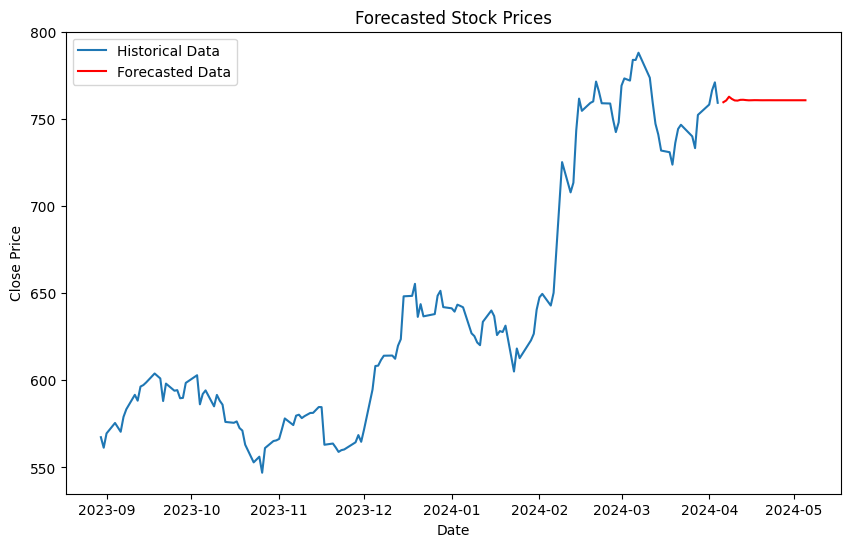

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Historical Data')
plt.plot(forecast_dates, forecast, label='Forecasted Data', color='red')
plt.title('Forecasted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()